# Quickstart guide
This notebook demonstrates how to work with geospatial climate data (ERA5 geopotential at 500 hPa). 

## Key Steps

### 1. Data Loading
- Downloads ERA5 geopotential data from a remote server
- Loads multiple NetCDF files and concatenates them into a single xarray Dataset
- Standardizes dimension ordering (time, lat, lon)

### 2. Data Exploration
- Inspects the dataset structure and metadata
- Examines latitude, longitude, and time dimensions
- Visualizes a sample geopotential field

### 3. Data Processing
- Extracts the 500 hPa pressure level (Z500)
- Converts geopotential (m²/s²) to geopotential height (meters) using gravitational constant
- Subsets data to the Northern Hemisphere (20°N–90°N latitude)

### 4. Visualization
- Creates a map visualization of geopotential height

## Output
A geographical visualization showing ERA5 Z500 height distribution over the Northern Hemisphere for the first time step in the dataset.

In [ ]:
import os
import glob
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# # This might take a few minutes
# !wget "https://dataserv.ub.tum.de/s/m1524895/download?path=%2F5.625deg%2Fgeopotential_500&files=geopotential_500_5.625deg.zip" -O geopotential_500_5.625deg.zip


In [ ]:
# # Create data/raw directory if it doesn't exist
# os.makedirs("data/raw", exist_ok=True)

# # Unzip the file from data/ into data/raw/
# !unzip -d data/raw/ data/geopotential_500_5.625deg.zip


In [ ]:
# Open the data from data/raw/
fileList = sorted(glob.glob("data/raw/geopotential_500/*.nc"))

def loadOne(path):
    ds = xr.open_dataset(path)

    # Standard ordering of dimensions
    ds = ds.transpose("time", "lat", "lon")

    return ds

datasets = [loadOne(f) for f in fileList]

z500 = xr.concat(datasets, dim="time")

In [ ]:
print(z500)
print(z500.lat.values)
print(z500.lon.values)
print(z500.time.shape)

<xarray.Dataset> Size: 3GB
Dimensions:  (time: 350640, lat: 32, lon: 64)
Coordinates:
    level    int32 4B 500
  * lon      (lon) float64 512B 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * lat      (lat) float64 256B -87.19 -81.56 -75.94 ... 75.94 81.56 87.19
  * time     (time) datetime64[ns] 3MB 1979-01-01 ... 2018-12-31T23:00:00
Data variables:
    z        (time, lat, lon) float32 3GB 5.156e+04 5.158e+04 ... 4.873e+04
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-10 20:33:23 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...
[-87.1875 -81.5625 -75.9375 -70.3125 -64.6875 -59.0625 -53.4375 -47.8125
 -42.1875 -36.5625 -30.9375 -25.3125 -19.6875 -14.0625  -8.4375  -2.8125
   2.8125   8.4375  14.0625  19.6875  25.3125  30.9375  36.5625  42.1875
  47.8125  53.4375  59.0625  64.6875  70.3125  75.9375  81.5625  87.1875]
[  0.      5.625  11.25   16.875  22.5    28.125  33.75   39.375  45.
  50.625  56.25   61.875  67.5    73.125  78.75   84.375  90.     95.625
 101.25  106.875 

In [6]:
z500

<xarray.Dataset> Size: 3GB
Dimensions:  (time: 350640, lat: 32, lon: 64)
Coordinates:
    level    int32 4B 500
  * lon      (lon) float64 512B 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * lat      (lat) float64 256B -87.19 -81.56 -75.94 ... 75.94 81.56 87.19
  * time     (time) datetime64[ns] 3MB 1979-01-01 ... 2018-12-31T23:00:00
Data variables:
    z        (time, lat, lon) float32 3GB 5.156e+04 5.158e+04 ... 4.873e+04
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-10 20:33:23 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

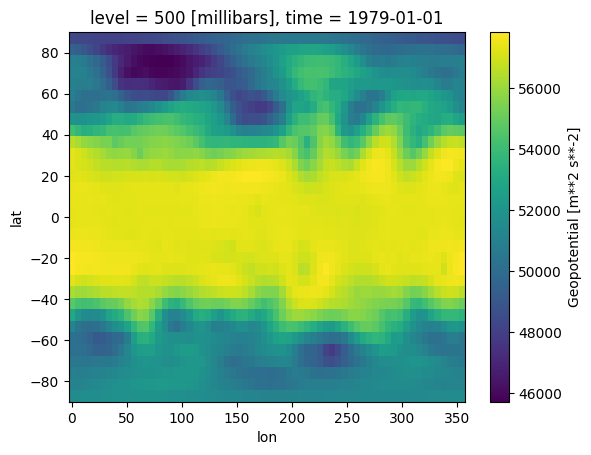

In [7]:
# Plot an example
z500.z.isel(time=0).plot();

In [ ]:
if "level" in z500.dims:
    z500Level = z500.sel(level=500)
else:
    z500Level = z500  # already single-level

z500Da = z500Level["z"]  # geopotential field

In [ ]:
# Convert to geopotential height
g = 9.80665
z500Height = z500Da / g

In [10]:
# Select a timestep
z500T0 = z500Height.isel(time=0)

In [11]:
# Subset to Northern Hemisphere (20°N–90°N)
latName = "latitude" if "latitude" in z500T0.coords else "lat"
lonName = "longitude" if "longitude" in z500T0.coords else "lon"

In [14]:
# Pick subset
z500Subset = z500T0.sel(lat=slice(20, 90))

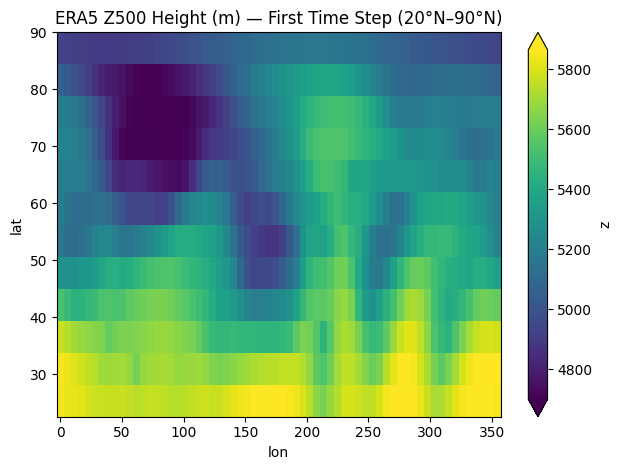

In [15]:
z500Subset.plot(
    x=lonName,
    y=latName,
    cmap="viridis",
    robust=True
)

plt.title("ERA5 Z500 Height (m) — First Time Step (20°N–90°N)")
plt.tight_layout()
plt.show()